# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

# План работы
- Шаг 1. Изучить общую информацию файла с данными.
- Шаг 2. Предобработка данных.
 - Определить и изучить пропущенные значения.
 - Привести данные к нужным типам
- Шаг 3. Посчитать и добавить в таблицу:
 - цену квадратного метра;
 - день недели, месяц и год публикации объявления;
 - этаж квартиры; варианты — первый, последний, другой;
 - соотношение жилой и общей площади, а также отношение площади кухни к общей.
- Шаг 4. Провести исследовательский анализ данных и выполнить инструкции:
 - Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.
 - Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
 - Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.
 - Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
 - Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.
 - Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге. Выяснить, какая область входит в центр. Создать столбец с расстоянием до центра в километрах. После этого посчитать среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется, — это и будет центральная зона.
 - Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всей базе?
- Шаг 5. Общий вывод.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Датафрейм состоит из 22 столбцов и 23699 строк. Присутствуют разные типы данных: bool(2), float64(14), int64(3), object(3). В 14 столбцах есть пропущенные значения.

## Предобработка данных

Определяем процентное соотношение пропущенных значений NaN к общему количеству значений по столбцам.

In [5]:
for colunm in df:
    ratio = len(df[df[colunm].isna()]) / df.shape[0]
    if ratio > 0:
        print(f'Процент пропущенных значений в столбце {colunm} равен {ratio:.2%}')

Процент пропущенных значений в столбце ceiling_height равен 38.80%
Процент пропущенных значений в столбце floors_total равен 0.36%
Процент пропущенных значений в столбце living_area равен 8.03%
Процент пропущенных значений в столбце is_apartment равен 88.29%
Процент пропущенных значений в столбце kitchen_area равен 9.61%
Процент пропущенных значений в столбце balcony равен 48.61%
Процент пропущенных значений в столбце locality_name равен 0.21%
Процент пропущенных значений в столбце airports_nearest равен 23.38%
Процент пропущенных значений в столбце cityCenters_nearest равен 23.29%
Процент пропущенных значений в столбце parks_around3000 равен 23.28%
Процент пропущенных значений в столбце parks_nearest равен 65.91%
Процент пропущенных значений в столбце ponds_around3000 равен 23.28%
Процент пропущенных значений в столбце ponds_nearest равен 61.56%
Процент пропущенных значений в столбце days_exposition равен 13.42%


Удалим строки столбца "название населённого пункта" - "locality_name" с пропусками из-за их малого количества.

In [6]:
len(df[df['locality_name'].isna()])

49

In [7]:
df = df.dropna(subset=['locality_name']).reset_index(drop=True)

In [8]:
len(df[df['locality_name'].isna()])

0

In [9]:
df['locality_name'].value_counts()

Санкт-Петербург                  15721
посёлок Мурино                     522
посёлок Шушары                     440
Всеволожск                         398
Пушкин                             369
                                 ...  
деревня Большой Сабск                1
деревня Кисельня                     1
поселок Пансионат Зелёный Бор        1
деревня Каськово                     1
поселок Усть-Луга                    1
Name: locality_name, Length: 364, dtype: int64

Число балконов с значением NaN заменяем на 0. Т.к пропуск в этом столбце, скорее всего, соответствует отсутствию балкона.

In [10]:
len(df[df['balcony'].isna()])

11513

In [11]:
df['balcony'].fillna(0, inplace=True)

In [12]:
len(df[df['balcony'].isna()])

0

Апартаменты с значениями NaN заменяем на False. Пустые значения значат, что недвижимость не является апартаментами.

In [13]:
len(df[df['is_apartment'].isna()])

20890

In [14]:
df['is_apartment'].fillna(False, inplace=True)

In [15]:
len(df[df['is_apartment'].isna()])

0

In [16]:
df['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

Проанализируем распределение столбца "days_exposition" - сколько дней было размещено объявление (от публикации до снятия).

Добавим столбец, который показывает пропущено значение столбца "days_exposition" или нет.

In [17]:
df['nan_day_exposition'] = df['days_exposition'].isna()

Переведем значения столбца "first_day_exposition" в тип datetime

In [18]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Построим график распределения количества пропущенных значений в столбце 'days_exposition' от даты публикации

<AxesSubplot:xlabel='first_day_exposition'>

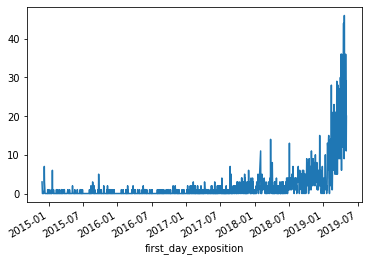

In [19]:
df.groupby('first_day_exposition')['nan_day_exposition'].sum().plot()

Количество пропусков возрастает с увеличением даты публикации (наибольшее количество пропущенных значений у более свежих объявлений). Поэтому будем считать пропущенные значения соответствуют открытому объявлению. Данный пропуски замолнять не требуется.

В столбце cityCenters_nearest заменим пустые значения на медианы с группировкой по населенному пункту.

In [20]:
df['cityCenters_nearest'].isna().sum()

5511

In [21]:
for locality in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality, 'cityCenters_nearest'].median()
    df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == locality), 'cityCenters_nearest'] = median

In [22]:
df['cityCenters_nearest'].isna().sum()

5386

Замена пустых значений в cityCenters_nearest с группировкой по населенному пункту удалась только для 125 строчек. Оставшиеся пустые значения заменим на медиану по всему столбцу.

In [23]:
df.loc[df['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = df['cityCenters_nearest'].median()

In [24]:
df['cityCenters_nearest'].isna().sum()

0

Все пропуски в столбце сityCenters_nearest заполнены.

Остальные пустые значения в столбцах заменим на медианное значение каждого столбца.

Составим список столбцов с пустыми значениями.

In [25]:
colunms_with_nan = ['ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'airports_nearest']

Составим функцию для замены пропусков в столбцах на медианное значение.

In [26]:
def nan_to_median(list):
    for column in list:
        df.loc[df[column].isna(), column] = df[column].median()

In [27]:
nan_to_median(colunms_with_nan)

Пропуски в картографических данных parks_around3000 и ponds_around3000 заменим на 0. Для этого запишем столбцы в отдельный список и составим функцию для замены пустых значений на 0 для списка. Для проверки правильности замены составим list comprehension с суммой пустых значений для каждого столбца.

In [28]:
cart_list_with_nan = ['parks_around3000', 'ponds_around3000']

In [29]:
[df[column].isna().sum() for column in cart_list_with_nan]

[5510, 5510]

In [30]:
def fill_cart_list(list):
    for column in list:
        df.loc[df[column].isna(), column] = df[column].fillna(0)

In [31]:
fill_cart_list(cart_list_with_nan)

In [32]:
[df[column].isna().sum() for column in cart_list_with_nan]

[0, 0]

Пустые значения в столбцах с картографическими данными заменены.  

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

Переведем типы колонок к типу "int".

In [34]:
df[['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
   'ponds_around3000']] = df[['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
   'ponds_around3000']].astype('int')

Округлим значения столбца days_exposition до одного знака после запятой.

In [35]:
df['days_exposition'] = df['days_exposition'].round(1)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Цена квадратного метра

In [37]:
df['price_per_square_meter'] = (df['last_price'] / df['total_area'])

День недели , месяц и год публикации объявления

In [38]:
df['day_week_exposition'] = df['first_day_exposition'].dt.dayofweek

In [39]:
df['month_exposition'] = df['first_day_exposition'].dt.month

In [40]:
df['year_exposition'] = df['first_day_exposition'].dt.year

Этаж квартиры, варианты — первый, последний, другой

In [41]:
def floor_category(row):
    category = ''
    if row['floor'] == 1:
        category = 'первый'
    elif row['floor'] == row['floors_total']:
        category = 'последний'
    else:
        category = 'другой'
    return category

In [42]:
df['floor_category'] = df.apply(floor_category, axis=1)

Соотношение жилой и общей площади, а также отношение площади кухни к общей

In [43]:
df['ratio_living_to_total_area'] = (df['living_area'] / df['total_area']).round(3)

In [44]:
df['ratio_kitchen_to_total_area'] = (df['kitchen_area'] / df['total_area']).round(3)

In [45]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,nan_day_exposition,price_per_square_meter,day_week_exposition,month_exposition,year_exposition,floor_category,ratio_living_to_total_area,ratio_kitchen_to_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,True,120370.370370,3,3,2019,другой,0.472,0.231
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,81.0,False,82920.792079,1,12,2018,первый,0.460,0.272
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558.0,False,92785.714286,3,8,2015,другой,0.612,0.148
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,234.0,424.0,False,408176.100629,4,7,2015,другой,0.189,0.057
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,False,100000.000000,1,6,2018,другой,0.320,0.410


## Исследовательский анализ данных

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

Изучим площадь квартир.

<AxesSubplot:>

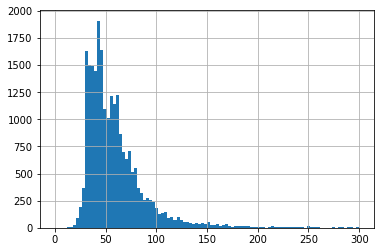

In [46]:
df['total_area'].hist(bins=100, range=(0, 300))

In [47]:
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Среднее значение площади квартир примерно 60 квад.метров, медианное - 52 квад.метра

Изучим цену за квадратный метр

<AxesSubplot:>

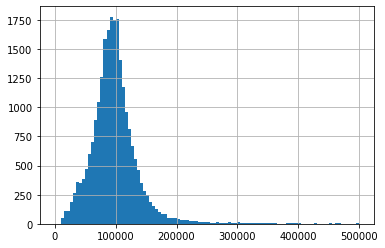

In [48]:
df['price_per_square_meter'].hist(bins=100, range=(0, 500000))


In [49]:
df['price_per_square_meter'].describe()

count    2.365000e+04
mean     9.943225e+04
std      5.033794e+04
min      1.118349e+02
25%      7.661497e+04
50%      9.500000e+04
75%      1.142742e+05
max      1.907500e+06
Name: price_per_square_meter, dtype: float64

Среднее значение цены примерно 99400, медианное - 95000

Изучим число комнат

<AxesSubplot:>

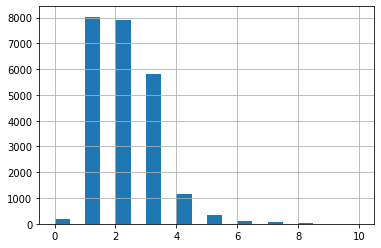

In [50]:
df['rooms'].hist(bins=20, range=(0, 10))

In [51]:
df['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Среднее значение и медиана - 2 комнаты.

 Изучим высоту потолков

<AxesSubplot:>

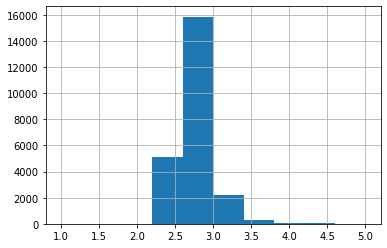

In [52]:
df['ceiling_height'].hist(bins=10, range=(1, 5))

In [53]:
df['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Среднее значение высоты потолков примерно 2,7 метра, медианное - 2,65

### Изучим время продажи квартиры.

In [54]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана - 95 дней, среднее - примерно 181 день. Минимальное время продажи - 1 день, Максимальное - 1580 дней. 

Построим гистограмму и диаграмму размаха.

<AxesSubplot:>

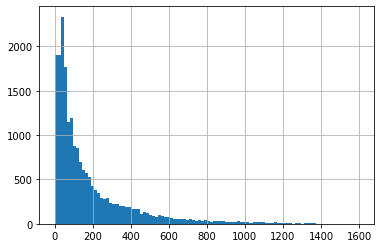

In [55]:
df['days_exposition'].hist(bins=100,  range=(0,1600))

(-15.0, 600.0)

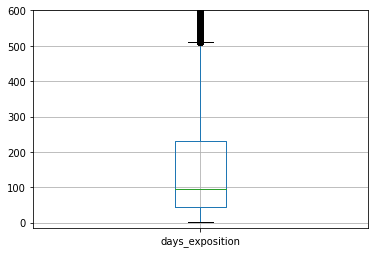

In [56]:
df.boxplot(column='days_exposition')
plt.ylim(-15,600)

По диаграмме размаха видно, на верхней границе есть большое количество выбросов. Вычислим пограничное значение и отбросим значения времени продажи выше данного значения.

In [57]:
x2= 231 + 1.5 * (231 - 45)

In [58]:
x2

510.0

In [59]:
filtered_days_exposition_data = df.query('days_exposition < 510')

<AxesSubplot:>

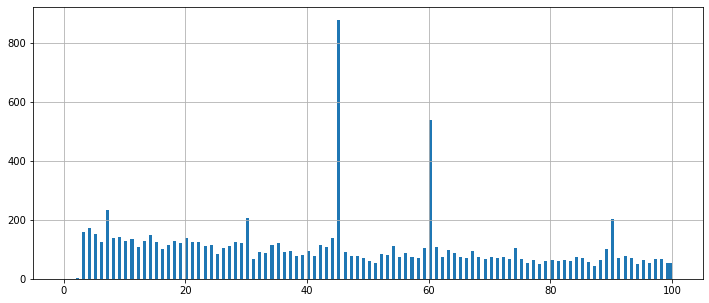

In [60]:
filtered_days_exposition_data['days_exposition'].hist(bins=200, range=(0, 100), figsize=(12,5))

Наблюдается максимальный пик со значением в 45 дней. Также есть пики в 60, 7, 30, 90 дней. В правилах Яндекс.Недвижимости существуют сроки, в течение которых объявления о продаже считается актуальными, и по истечении этих сроков объявления снимаются с публикации. Эти сроки как раз совпадают с полученными пиками. Поэтому удалим эти пиковые значения из среза, чтобы они не искажали картины о реально проданных квартирах.

In [61]:
new_filtered_days_exposition_data  = filtered_days_exposition_data.query('days_exposition not in [7, 30, 45, 60, 90]')

<AxesSubplot:>

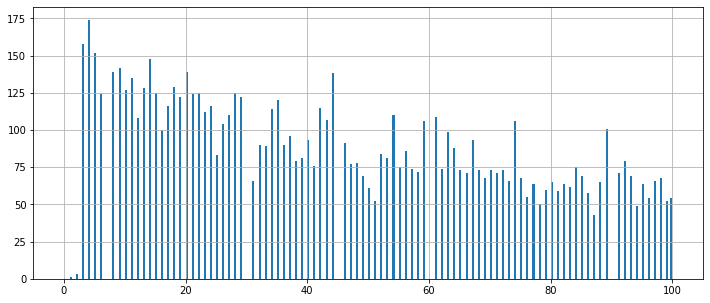

In [62]:
new_filtered_days_exposition_data['days_exposition'].hist(bins=300, range=(0, 100), figsize=(12,5))

In [63]:
len(new_filtered_days_exposition_data)

16728

Исследуем  следующие параметры на выбросы: площадь, цена, число комнат, высота потолков.

Площадь

(-10.0, 200.0)

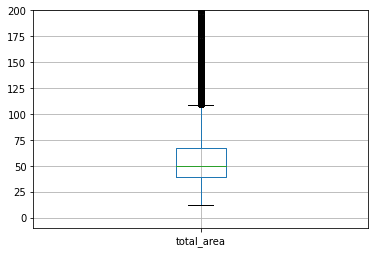

In [64]:
new_filtered_days_exposition_data.boxplot(column='total_area')
plt.ylim(-10, 200)

In [65]:
new_filtered_days_exposition_data['total_area'].describe()

count    16728.000000
mean        58.034999
std         33.463986
min         12.000000
25%         39.000000
50%         50.000000
75%         67.000000
max        900.000000
Name: total_area, dtype: float64

In [66]:
x2_total_area = 67 + 1.5 * (67 - 39)

In [67]:
x2_total_area

109.0

Граница нижнего уса соответствует минимуму и равна 12 квад.метров. Отбросим выбросы с площадью более 109 квадр.метров.

In [68]:
filtered_data = new_filtered_days_exposition_data.query('total_area <= @x2_total_area')

Цена

<AxesSubplot:>

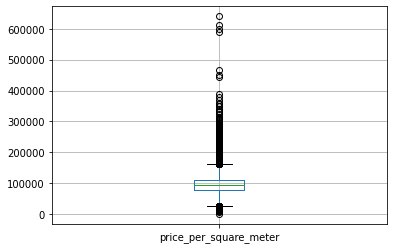

In [69]:
filtered_data.boxplot(column='price_per_square_meter')

In [70]:
filtered_data['price_per_square_meter'].describe()

count     15926.000000
mean      94935.403699
std       33971.268321
min         111.834862
25%       76512.986420
50%       93426.502647
75%      110465.116279
max      640422.350472
Name: price_per_square_meter, dtype: float64

In [71]:
x2_price_per_square_meter = round(110465.116279 + 1.5 * (110465.116279 - 76512.986420))

In [72]:
x2_price_per_square_meter 

161393

In [73]:
x1_price_per_square_meter = round(76512.986420 - 1.5 * (110465.116279 - 76512.986420))

In [74]:
x1_price_per_square_meter

25585

<AxesSubplot:>

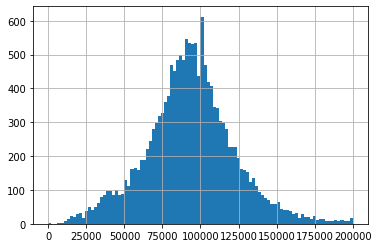

In [75]:
filtered_data['price_per_square_meter'].hist(bins=100, range=(0, 200000))


Отбросим выбросы с ценой менее 25585 и более 161393.

In [76]:
filtered_data = filtered_data.query('@x2_price_per_square_meter >= price_per_square_meter >= @x1_price_per_square_meter')

Число комнат

In [77]:
filtered_data['rooms']

1        1
4        2
5        1
6        1
8        1
        ..
23639    3
23640    1
23641    2
23643    1
23644    3
Name: rooms, Length: 15319, dtype: int64

<AxesSubplot:>

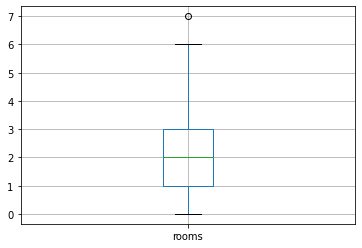

In [78]:
filtered_data.boxplot(column='rooms')

In [79]:
filtered_data['rooms'].describe()

count    15319.000000
mean         1.892291
std          0.879481
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Из диаграммы размаха видно, что верхняя граница соответствует 6 комнатам, поэтому отбросим квартиры с 7ю комнатами.

In [80]:
filtered_data = filtered_data.query('rooms <= 6')

### Определение факторов, которые больше всего влияют на стоимость квартиры?

Составим новый таймфрейм со столбцами, по которым необходимо произвести исследование.

In [81]:
new_df = filtered_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]

Составим матрицу рассеяния и и матрицу корреляции.

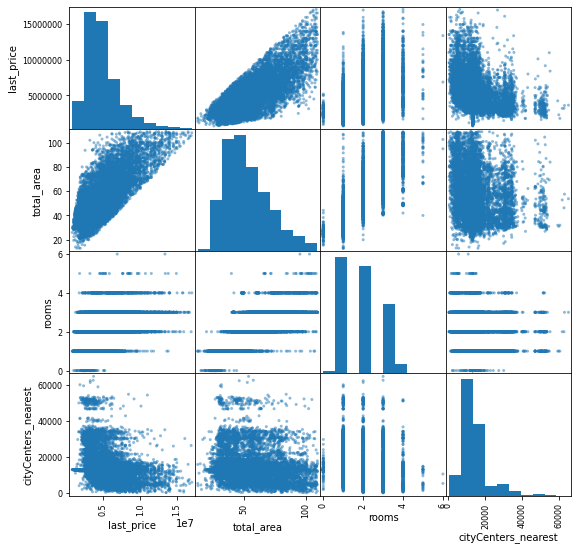

In [82]:
pd.plotting.scatter_matrix(new_df, figsize=(9, 9)) 
None

In [83]:
print(new_df.corr()) 

                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.762608  0.488043            -0.241754
total_area             0.762608    1.000000  0.801301            -0.124748
rooms                  0.488043    0.801301  1.000000            -0.082014
cityCenters_nearest   -0.241754   -0.124748 -0.082014             1.000000


Из матрицы корреляции видно, что наибольшая прямая связь между ценой и общей площадью квартиры, более слабая между ценой и числом комнат. 
Слабая отрицательная корреляция между ценой и удаленностью от центра.






Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

<AxesSubplot:xlabel='floor_category'>

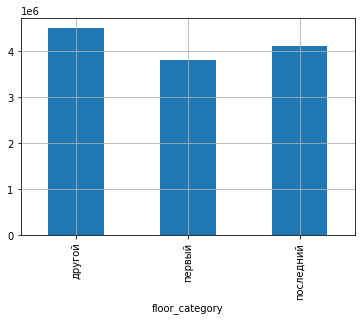

In [84]:
filtered_data.groupby('floor_category')['last_price'].median().plot(kind='bar', x='floor_category', y='last_price', grid=True)

In [85]:
print(filtered_data['last_price'].corr(filtered_data['floor']))

0.12190896946786935


Наименьшая цены приходятся на квартиры на первом этаже. Наиболее высокие цены на квартриры, находящиеся не на первом и не последнем этаже.

Изучим зависимость от даты размещения: дня недели, месяца и года.

In [86]:
df_corr_data = filtered_data[['last_price', 'day_week_exposition', 'month_exposition', 'year_exposition']]

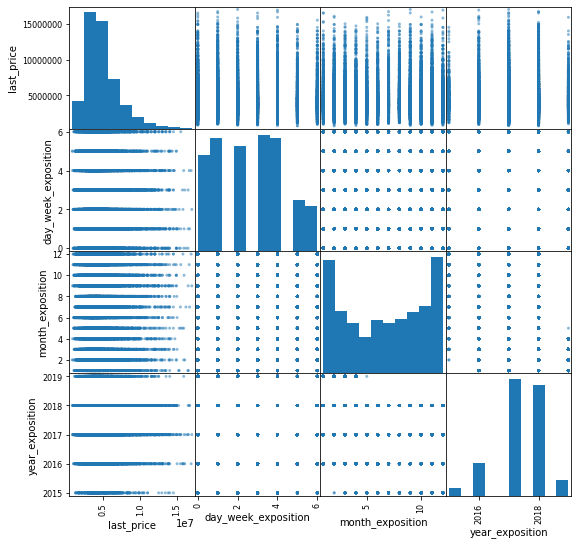

In [87]:
pd.plotting.scatter_matrix(df_corr_data, figsize=(9, 9)) 
None

In [89]:
print(df_corr_data.corr()) 

                     last_price  day_week_exposition  month_exposition  \
last_price             1.000000            -0.010711         -0.002959   
day_week_exposition   -0.010711             1.000000          0.011346   
month_exposition      -0.002959             0.011346          1.000000   
year_exposition        0.003609            -0.003575         -0.209557   

                     year_exposition  
last_price                  0.003609  
day_week_exposition        -0.003575  
month_exposition           -0.209557  
year_exposition             1.000000  


По матрице корреляции связь между ценой квартиры и годом, днём недели,а также месяцем размещения объявления практически отсутствует. Корреляции на нулевом уровне.

### Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

Создадим новый датафрейм со столбцами 'название населённого пункта' и 'цена за квадратный метр'

In [90]:
locality_price_per_meter_df = filtered_data[['locality_name', 'price_per_square_meter']]

Создадим сводную таблицу 

In [91]:
locality_price_per_meter_df = locality_price_per_meter_df.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])

In [92]:
locality_price_per_meter_df.columns = ['count', 'mean_price_per_meter']

In [93]:
top10_locality = locality_price_per_meter_df.sort_values(by='count', ascending=False).head(10).astype(int)

In [94]:
top10_locality

,count,mean_price_per_meter
locality_name,,
Санкт-Петербург,10072,103753
посёлок Мурино,439,85903
посёлок Шушары,335,78199
Всеволожск,272,66569
Колпино,257,74953
посёлок Парголово,246,89598
Пушкин,240,100630
деревня Кудрово,233,92346
Гатчина,212,68139


Самая высокая цена в Санкт-Петербурге, низкая в Выборге.

### Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Требуется выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

In [95]:
piter_data = filtered_data[filtered_data['locality_name'] == 'Санкт-Петербург']

In [96]:
piter_data['cityCenters_nearest_km'] = (piter_data['cityCenters_nearest'] / 1000).astype(int)

In [98]:
piter_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,nan_day_exposition,price_per_square_meter,day_week_exposition,month_exposition,year_exposition,floor_category,ratio_living_to_total_area,ratio_kitchen_to_total_area,cityCenters_nearest_km
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121.0,False,100000.000000,1,6,2018,другой,0.320,0.410,8
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,289.0,False,88524.590164,6,2,2017,другой,0.715,0.107,15
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,137.0,False,127525.252525,3,11,2017,другой,0.513,0.215,13
15,16,4650000,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,19.0,False,119230.769231,5,11,2017,другой,0.526,0.195,14
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,397.0,False,81707.317073,3,11,2017,первый,0.678,0.110,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23637,8,3300000,31.0,2017-04-29,1,2.55,9,18.0,6,False,...,193.0,False,106451.612903,5,4,2017,другой,0.581,0.210,11
23638,6,3200000,39.0,2017-12-16,1,2.65,9,20.0,6,False,...,38.0,False,82051.282051,5,12,2017,другой,0.513,0.282,16
23639,19,9200000,101.0,2019-04-01,3,3.05,15,63.0,12,False,...,23.0,False,91089.108911,0,4,2019,другой,0.624,0.149,14
23640,13,3550000,35.3,2018-02-28,1,2.86,15,16.3,4,False,...,29.0,False,100566.572238,2,2,2018,другой,0.462,0.258,16


Построим график зависимости стоимости квартиры от удаленности от центра города.

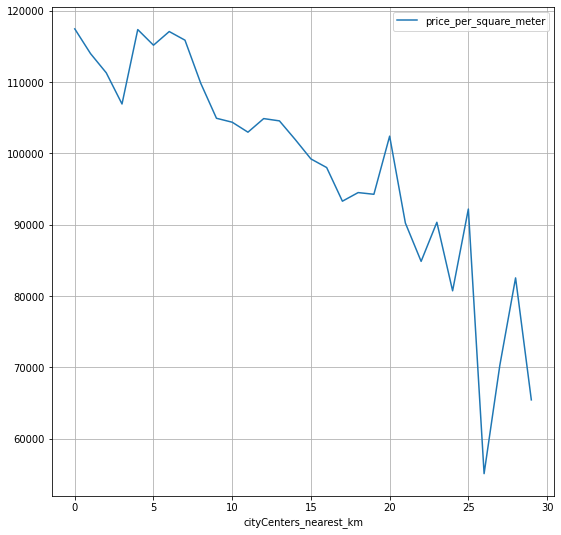

In [99]:
piter_data_pivot_table = piter_data.pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter', aggfunc='mean').plot(grid=True, figsize=(9,9))

На отметке в 7 км от центра наблюдается резкое снижение цены квартриры. Это значение примем за границу центральной зоны города.

### Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [100]:
piter_center_data = piter_data.query('cityCenters_nearest_km <= 7')

In [101]:
list = ['total_area', 'price_per_square_meter','rooms','ceiling_height']

Запишем функцию для отображения гистограмм и и вызова метода describe() 

In [102]:
def hist_data(data, list):
    return(data[list].hist(figsize=(9,9)), data[list].describe())    

(array([[<AxesSubplot:title={'center':'total_area'}>,
         <AxesSubplot:title={'center':'price_per_square_meter'}>],
        [<AxesSubplot:title={'center':'rooms'}>,
         <AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object),
         total_area  price_per_square_meter        rooms  ceiling_height
 count  1612.000000             1612.000000  1612.000000     1612.000000
 mean     65.903592           114588.672448     2.338089        2.863989
 std      20.896516            23223.943851     0.927121        0.320833
 min      13.000000            26250.000000     0.000000        2.400000
 25%      48.175000            96439.120944     2.000000        2.650000
 50%      65.450000           113053.700357     2.000000        2.700000
 75%      82.000000           132555.428135     3.000000        3.000000
 max     109.000000           161272.264631     6.000000        5.300000)

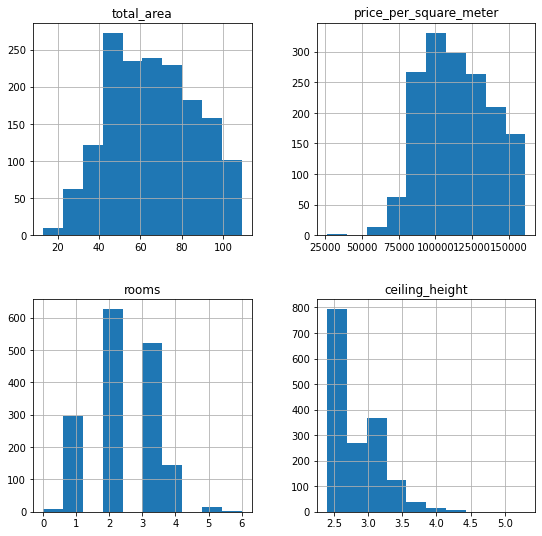

In [103]:
hist_data(piter_center_data, list)

В центральном районе медианное значение площади квартир больше чем по всей базе (65 против 52 квадратных метров), стоимость квадратного метра выше 113053 против 95000), количество комнат больше (2-3 против 1-2), потолки ненамного выше (2,7 против 2,65) 

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления

In [104]:
piter_df = piter_center_data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]

In [105]:
piter_df

,last_price,total_area,rooms,cityCenters_nearest
24,6500000,97.2,2,2336
94,3500000,29.5,1,7303
99,9600000,90.0,4,2818
111,4590000,40.0,1,6175
136,6500000,51.8,2,3618
...,...,...,...,...
23583,5000000,38.0,1,7257
23595,4990000,62.5,2,4415
23616,4250000,47.0,1,4946
23632,5250000,43.0,2,7262


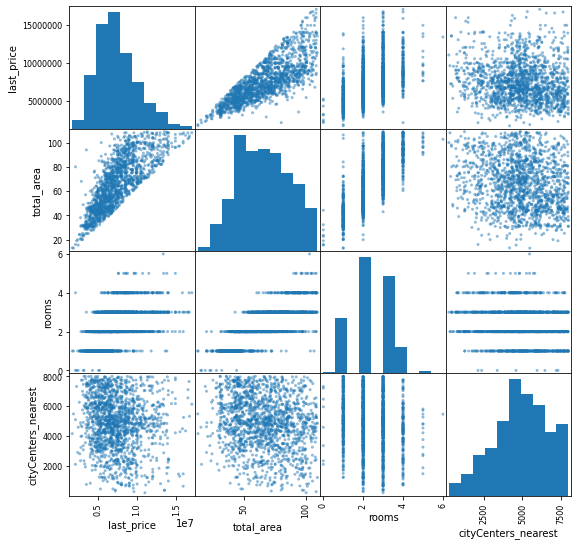

In [106]:
pd.plotting.scatter_matrix(piter_df, figsize=(9, 9)) 
None

In [107]:
print(piter_df.corr()) 

                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.786618  0.492284            -0.114098
total_area             0.786618    1.000000  0.767059            -0.175732
rooms                  0.492284    0.767059  1.000000            -0.156338
cityCenters_nearest   -0.114098   -0.175732 -0.156338             1.000000


По полученным результатам видно, что для центра города связь между ценой и общей площадью и количеством комнат на таком же уровне как и для всей бызы объявлений. Отличается лишь зависимость от расстояния до центра. Если для всей базы имеется слабая отрицательная зависимость, то для центра города эта зависимость еще слабее (-0,114).


Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

<AxesSubplot:xlabel='floor_category'>

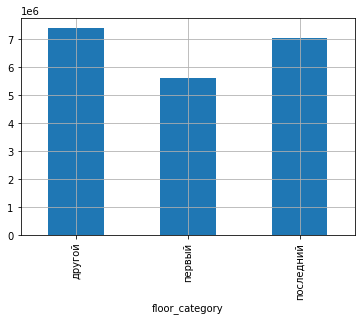

In [108]:
piter_center_data.groupby('floor_category')['last_price'].median().plot(kind='bar', x='floor_category', y='last_price', grid=True)

In [109]:
print(piter_center_data['last_price'].corr(piter_center_data['floor']))

0.17523913734728677


Для центральной части Санкт-Петербурга зависимость между ценой и этажом квартиры такая же как и для всей базы. Наименьшая цены приходятся на квартиры на первом этаже. Наиболее высокие цены на квартриры, находящиеся не на первом и не последнем этаже.

Изучим зависимость от даты размещения: дня недели, месяца и года.

In [110]:
piter_corr_data = piter_center_data[['last_price', 'day_week_exposition', 'month_exposition', 'year_exposition']]

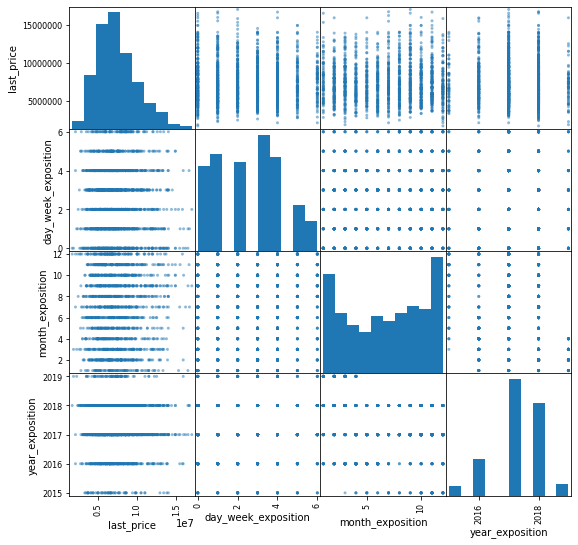

In [111]:
pd.plotting.scatter_matrix(piter_corr_data, figsize=(9, 9)) 
None

In [112]:
print(piter_corr_data.corr()) 

                     last_price  day_week_exposition  month_exposition  \
last_price             1.000000            -0.014078         -0.000303   
day_week_exposition   -0.014078             1.000000          0.040911   
month_exposition      -0.000303             0.040911          1.000000   
year_exposition       -0.005289            -0.004697         -0.178361   

                     year_exposition  
last_price                 -0.005289  
day_week_exposition        -0.004697  
month_exposition           -0.178361  
year_exposition             1.000000  


По матрице корреляции видно, что связь между ценой квартиры для центра города и годом, днём недели,а также месяцем размещения объявления  отсутствует, также как и для всей базы объявлений.

В ходе анализа по центру города было выявлено одно отличие от всей базы объявлений. По всей базе объявлений прослеживается  слабая зависимость от расстояния от центра, то в центре такая зависимость отсутствует.
По остальным параметрам зависимости не отличаются.


## Общий вывод

Был изучен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Данный датасет состоял из 22 столбцов и 23699 строк.  

Была проведена предобработка данных:
 - Обработаны пропущенные значения: 
  - Удалены строки с пропусками в столбце "locality_name" (название населённого пункта) из-за их малого количества.
  - Пропущенные значения столбца "balcony" (число балконов) заменены на 0.
  - Пропущенные значения столбца "is_apartment" (апартаменты) заменены на False.
  - Проведен дополнительный анализ столбца "days_exposition" (сколько дней было размещено объявление). Из которого следует, что  пропущенные значения соответствуют открытому объявлению, поэтому пропуски в этом столбце заполнять не требуется.
  - В столбце "cityCenters_nearest" (расстояние до центра города) пустые значения заменены, где это было возможно, на медианы с группировкой по населенному пункту. Остальный пропуски заменены медианой по всему столбцу.
  - Пропущенные значения в столбцах "ceiling_height" (высота потолков), "floors_total" (всего этажей в доме), "living_area" (living_area), "kitchen_area" (площадь кухни в квадратных метрах), "airports_nearest" (расстояние до ближайшего аэропорта в метрах) заменены на медианы по каждому столбцу.
   -  Пропуски в картографических данных "parks_around3000" (число парков в радиусе 3 км) и "ponds_around3000" (число водоёмов в радиусе 3 км) заменены на 0.
   - Пропуски в картографических данных "parks_nearest" (расстояние до ближайшего парка), "ponds_nearest" (расстояние до ближайшего водоёма) оставим без изменений.
 - Приведены значения в столбцах 'last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000' и 'ponds_around3000' к типу int. first_day_exposition к типу datetime. 
 
Были рассчитаны и добавлены в таблицу следующий столбцы:
- цена квадратного метра - 'price_per_square_meter';
- день недели, месяц и год публикации объявления - 'day_week_exposition', 'month_exposition', 'year_exposition';
- этаж квартиры; варианты — первый, последний, другой - 'floor_category';
- соотношение жилой и общей площади - 'ratio_living_to_total_area';
- отношение площади кухни к общей - 'ratio_kitchen_to_total_area'.

Был проведен исследовательсктй анализ данных
- Изучены следующие параметры: площадь, цена, число комнат, высота потолков. 
- Изучено время продажи квартиры.
Медианное значение - 95 дней, среднее - примерно 181 день. С помощью диаграммы размаха определено верхняя граница, когда продажи проходили необычно долго - 510 дней. Также были отсечены пики 7, 30, 45, 60 и 90 дней, которые проявились, исходя из правил Яндекс.Недвижимости. По истечении этих сроков объявления снимаются с публикации.
- С помощью диаграмм размаха убраны редкие и выбивающиеся значения.  
По площади квартиры убраны значения больше 109 квадратный метров;   
По цене за квадратный метр убраны значения меньше 25585 и более 161393 рублей за квадратный метр;   
По числу комнат убраны значения больше 6 комнат.
- Изучены зависимости цены квартиры от площади, числа комнат, удалённости от центра.  
Для этих данных были составлены матрица рассеяния и и матрица корреляции. По ним было установлено, что наибольшая прямая связь существует между ценой квартиры и общей площадью квартиры, более слабая между ценой и числом комнат. Слабая отрицательная корреляция между ценой и удаленностью от центра.
- Изучена зависимость цены квартиры от того, на каком этаже расположена квартира.  
Установлено, что наименьшая стоимость квартир приходится на первый этаж. Наибольшая на квартиры, расположенные между первым и последним этажом.
- Изучена зависимость от даты размещения.
Также были составлены матрица рассеяния и матрица корреляции. Связь между ценой квартиры и днём недели, месяцем, а также годом размещения объявления практически отсутствует. Корреляции на нулевом уровне.
- Выбраны 10 населённых пунктов с наибольшим числом объявлений, а также населённые пункты с самой высокой и низкой стоимостью жилья.  
Больше всего объявлений в Санкт-Петербурге - 10072. В остальных населенных пунктах объявлений горазно меньше. Самая высокая стоимость жилья в Сенкт-Петербурге и Пушкине - 103753 и 100630 соответственно. Самая низкая в Выборге - 57395.
- Определена граница центральной зоны в городе Санкт-Петербург.  
Был построен график зависимости стоимости квартиры от удаленности от центра города, на основе которого была определена граница в 7 км.
- Проанализирована центральная зона Санкт-Петербурга и произведено сравнение с данными по всей  базе объявлений.  
 - Изучены следующие параметры: площадь, цена, число комнат, высота потолков.  
 В центральном районе медианное значение площади квартрир больше, чем по всей базе (65 против 52 квадратных метров), стоимость квадратного метра выше 113053 против 95000), количество комнат больше (2-3 против 1-2), потолки ненамного выше (2,7 против 2,65).
 - Выделены факторы, которые влияют на стоимость квартиры.  
 По полученным результатам видно, что для центра города связь между ценой и общей площадью и количеством комнат на таком же уровне как и для всей бызы объявлений. Отличается лишь зависимость от расстояния до центра. Если для всей базы имеется слабая отрицательная зависимость, то для центра города эта зависимость еще слабее (-0,114).  
 Для центральной части Санкт-Петербурга зависимость между ценой и этажом квартиры такая же как и для всей базы. Наименьшая цены приходятся на квартиры на первом этаже. Наиболее высокие цены на квартриры, находящиеся между первым и последним этажами.  
 Связь между ценой квартиры для центра города и годом, днём недели,а также месяцем размещения объявления отсутствует, также как и для всей базы объявлений.  
 
 В ходе анализа по центру города было выявлено одно отличие от всей базы объявлений. По всей базе объявлений прослеживается  слабая зависимость от расстояния от центра, то в центре такая зависимость отсутствует.
По остальным параметрам зависимости не отличаются.
 